<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA & Data Wrangling**

In [1]:
# EDA and Wrangling Libraries
import pandas as pd
import numpy as np
import random as rnd

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/waizwafiq/Kaggle-Mavericks/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/waizwafiq/Kaggle-Mavericks/main/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending = True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [12]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending = True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


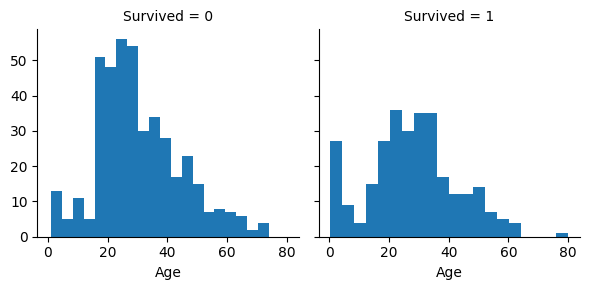

In [13]:
g = sns.FacetGrid(train_df,col = 'Survived')
g.map(plt.hist,'Age',bins = 20)

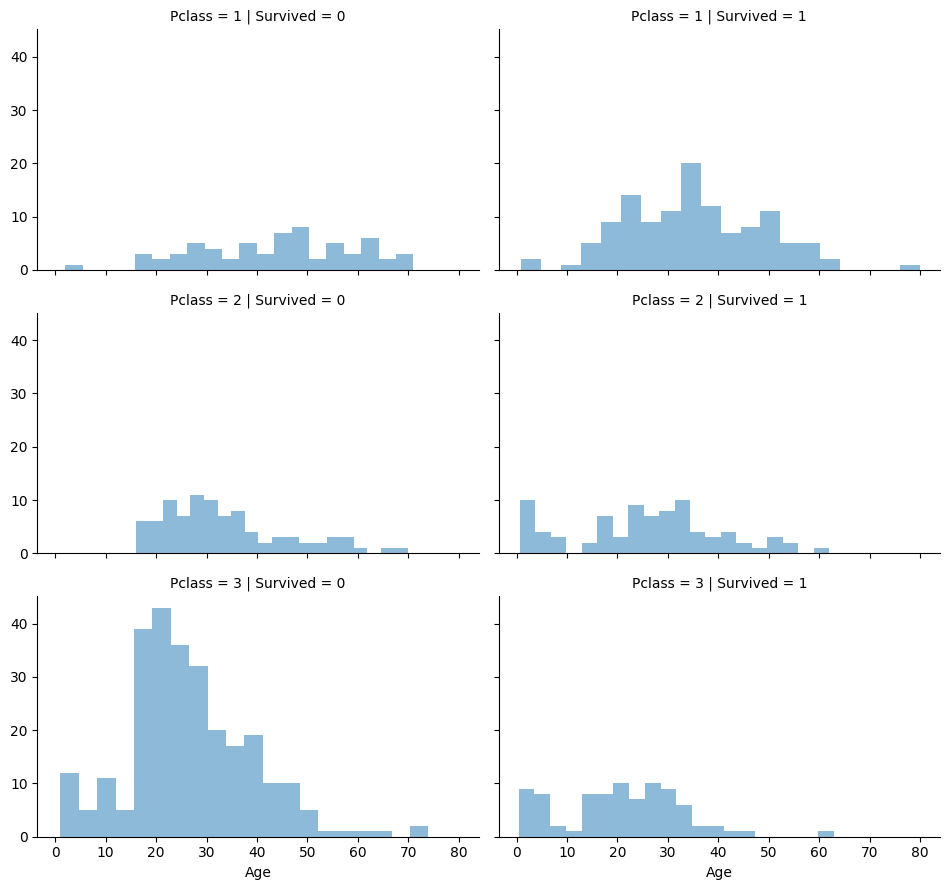

In [14]:
g = sns.FacetGrid(train_df,col = 'Survived',row = 'Pclass',aspect = 1.6)
g.map(plt.hist,'Age',bins = 20,alpha = 0.5)

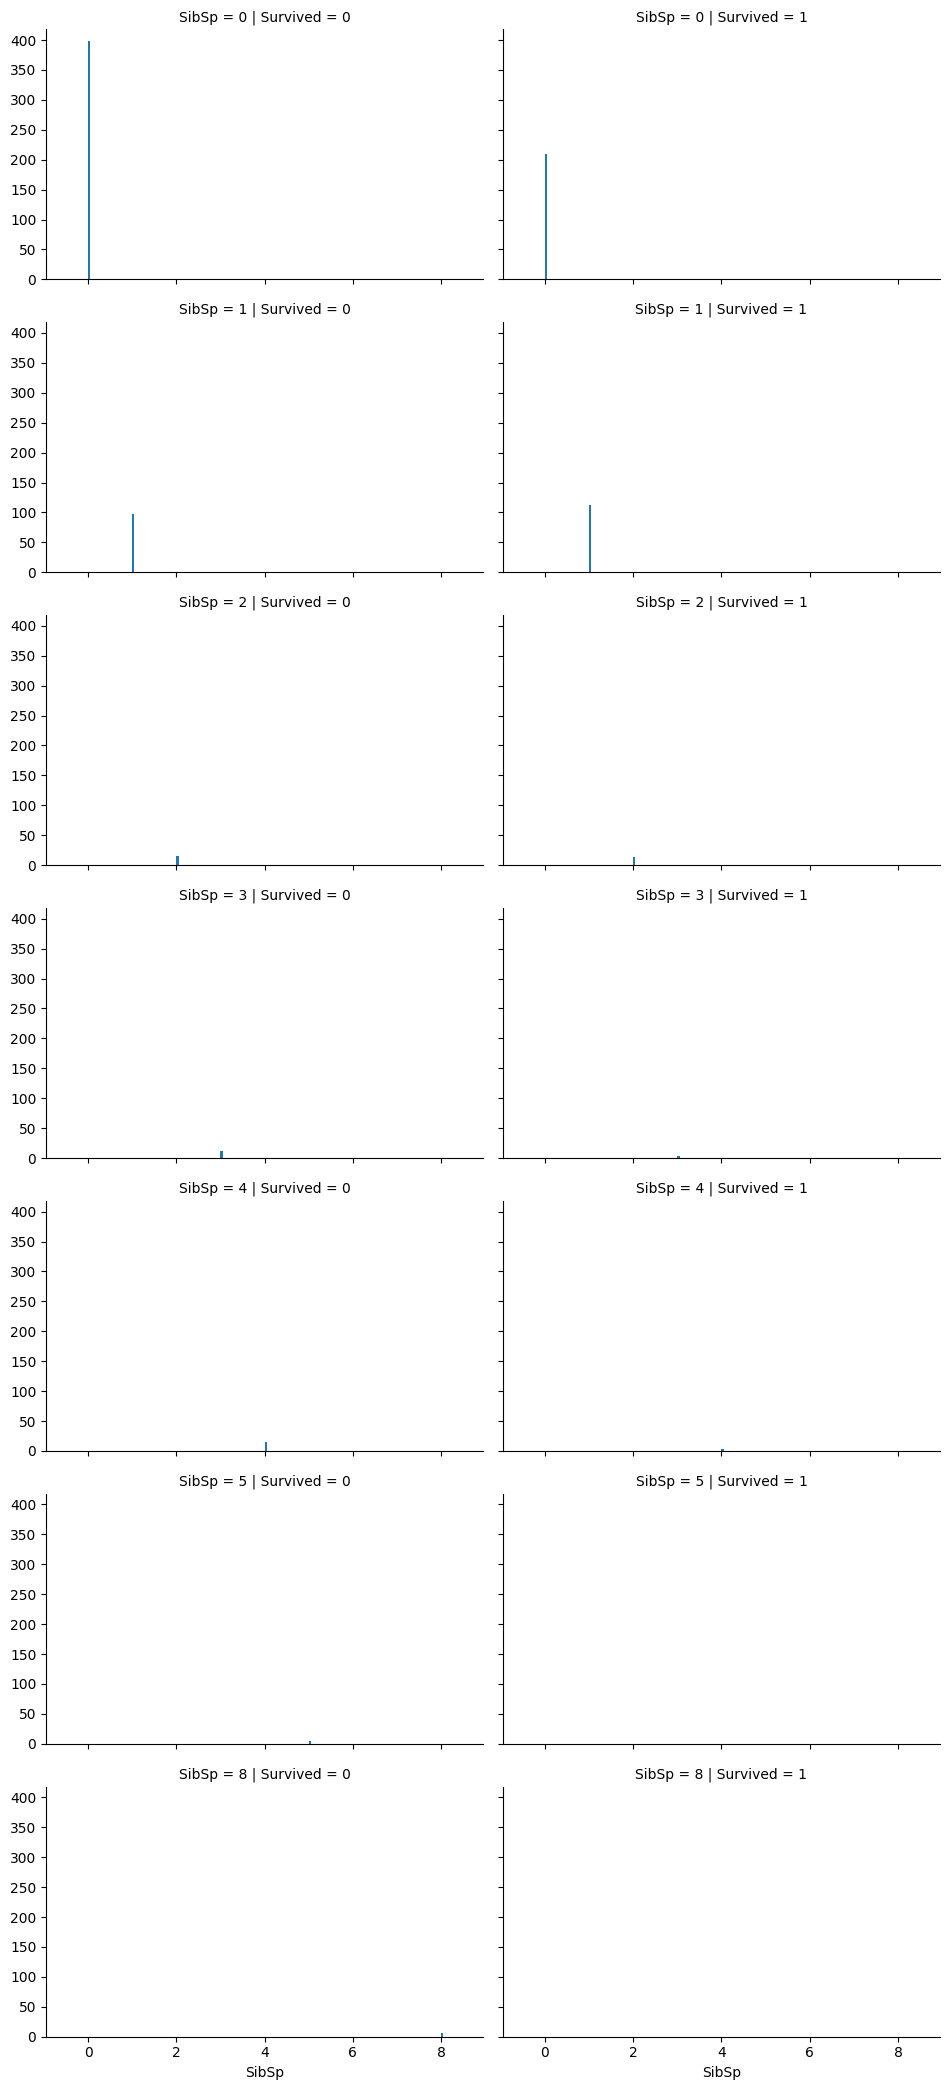

In [15]:
g = sns.FacetGrid(train_df,col = 'Survived',row = 'SibSp',aspect = 1.6)
g.map(plt.hist,'SibSp',bins = 20)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-pack

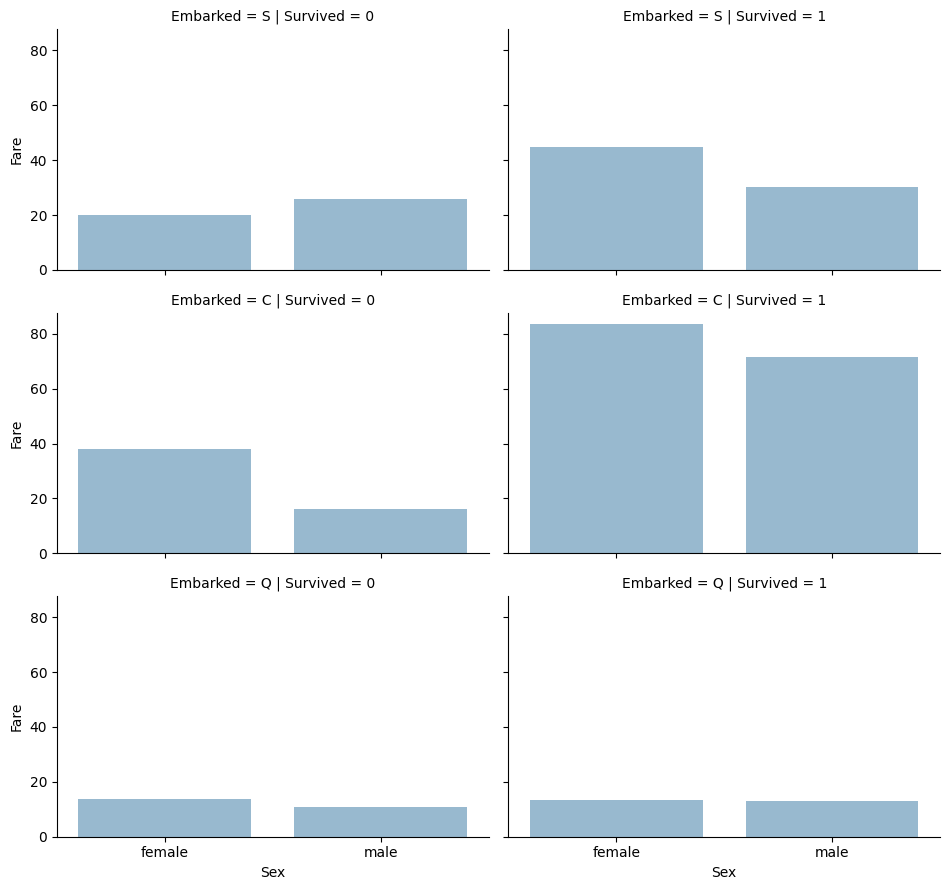

In [16]:
g = sns.FacetGrid(train_df,col = 'Survived',row = 'Embarked',aspect = 1.6)
g.map(sns.barplot,'Sex','Fare',ci = None,alpha = 0.5)

In [17]:
print('Before : ',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df.columns.values

Before :  (891, 12) (418, 11) (891, 12) (418, 11)


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [18]:
train_df = train_df.drop(['Ticket','Cabin'],axis = 1)
test_df = test_df.drop(['Ticket','Cabin'],axis = 1)
combine = [train_df,test_df]
print('Before : ',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before :  (891, 10) (418, 9) (891, 10) (418, 9)


In [19]:
train_df['Name'].iloc[80:100]

80                                 Waelens, Mr. Achille
81                          Sheerlinck, Mr. Jan Baptist
82                       McDermott, Miss. Brigdet Delia
83                              Carrau, Mr. Francisco M
84                                  Ilett, Miss. Bertha
85    Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...
86                               Ford, Mr. William Neal
87                        Slocovski, Mr. Selman Francis
88                           Fortune, Miss. Mabel Helen
89                               Celotti, Mr. Francesco
90                                 Christmann, Mr. Emil
91                           Andreasson, Mr. Paul Edvin
92                          Chaffee, Mr. Herbert Fuller
93                              Dean, Mr. Bertram Frank
94                                    Coxon, Mr. Daniel
95                          Shorney, Mr. Charles Joseph
96                            Goldschmidt, Mr. George B
97                      Greenfield, Mr. William 

In [20]:
train_df['title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)

In [21]:
test_df['title'] = test_df['Name'].str.extract('([A-Za-z]+)\.',expand = False)

In [22]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [48]:
train_df['title'] = train_df['title'].replace(['Lady','Countess','Capt','Col','Major','Don',
                           'Dr','Rev','Sir','Jonkheer','Dona'],'Rare')

train_df['title'] = train_df['title'].replace('Mlle','Miss')
train_df['title'] = train_df['title'].replace('Ms','Miss')
train_df['title'] = train_df['title'].replace('Mme','Miss')

test_df['title'] = test_df['title'].replace(['Lady','Countess','Capt','Col','Major','Don',
                           'Dr','Rev','Sir','Jonkheer','Dona'],'Rare')

test_df['title'] = test_df['title'].replace('Mlle','Miss')
test_df['title'] = test_df['title'].replace('Ms','Miss')
test_df['title'] = test_df['title'].replace('Mme','Miss')

In [24]:
train_df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [25]:
train_df[['title','Survived']].groupby(['title'],as_index=False).mean()

,title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.347826


In [26]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'title'], dtype=object)

In [27]:
train_df.drop('PassengerId',axis = 1,inplace = True)

In [28]:
train_df.drop('Name',axis = 1,inplace = True)

In [29]:
test_df.drop(['Name','PassengerId'],axis = 1,inplace = True)

In [30]:
combine = [train_df,test_df]

In [31]:
train_df['Sex'] = train_df['Sex'].map({'male':0,'female':1}).astype(int)

In [32]:
test_df['Sex'] = test_df['Sex'].map({'male':0,'female':1}).astype(int)

In [33]:
combine = [train_df,test_df]

In [34]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
train_df['Embarked'].mode()
highest_freq = train_df['Embarked'].mode().values[0]
highest_freq

'S'

In [36]:
train_df[train_df['Embarked'].isna()]
train_df['Embarked'].fillna(highest_freq,inplace = True)

In [37]:
train_df['Embarked'] = train_df['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [38]:
train_df[train_df['title'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title


In [39]:
train_df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [50]:
train_df['title'] = train_df['title'].map({'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare':4}).astype(int)
test_df['title'] = test_df['title'].map({'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Rare':4}).astype(int)

In [42]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


In [43]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,3,0,34.5,0,0,7.8292,2,Mr
1,3,1,47.0,1,0,7.0000,0,Mrs
2,2,0,62.0,0,0,9.6875,2,Mr
3,3,0,27.0,0,0,8.6625,0,Mr
4,3,1,22.0,1,1,12.2875,0,Mrs


In [41]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
title         0
dtype: int64

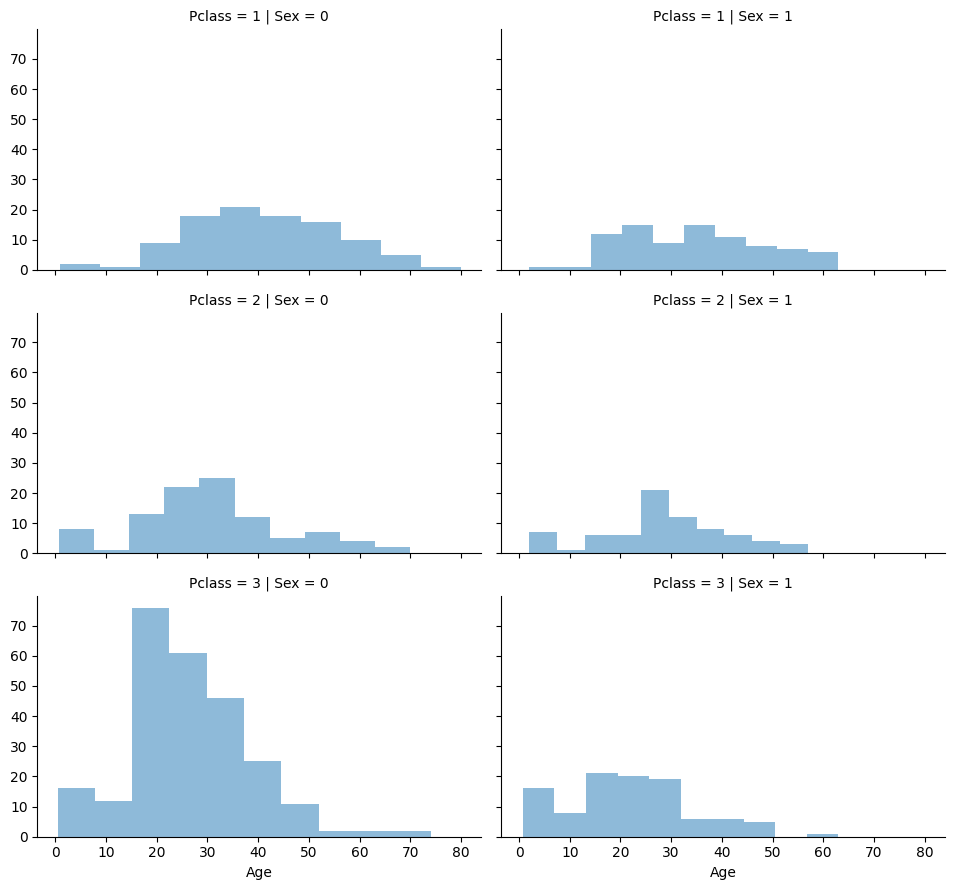

In [45]:
g = sns.FacetGrid(train_df,row = 'Pclass',col = 'Sex',aspect = 1.6)
g.map(plt.hist,'Age',alpha = 0.5)
g.add_legend()

In [51]:
guess_age = np.zeros((2,3))
guess_age

array([[0., 0., 0.],
       [0., 0., 0.]])

In [61]:
for i in range(2):
  for j in range(3):
    guess_df = train_df[(train_df['Sex'] == i) &  (train_df['Pclass'] == j+1) ]['Age'].dropna()
    age_guess = guess_df.median()
    guess_age[i,j] = int(age_guess/0.5 + 0.5) * 0.5

for i in range(2):
  for j in range(3):
    train_df.loc[(train_df['Age'].isnull()) & (train_df['Sex']==i) & (train_df['Pclass'] == j+1), 'Age'] = guess_age[i,j]

train_df['Age'] = train_df['Age'].astype(int)

In [ ]:
for i in range(2):
  for j in range(3):
    guess_df = test_df[(train_df['Sex'] == i) &  (test_df['Pclass'] == j+1) ]['Age'].dropna()
    age_guess = guess_df.median()
    guess_age[i,j] = int(age_guess/0.5 + 0.5) * 0.5

for i in range(2):
  for j in range(3):
    test_df.loc[(test_df['Age'].isnull()) & (test_df['Sex']==i) & (test_df['Pclass'] == j+1), 'Age'] = guess_age[i,j]

test_df['Age'] = test_df['Age'].astype(int)

In [62]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)

In [63]:
for dataset in combine:
   dataset.loc[dataset['Age']<=16,'Age'] = 0
   dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age'] = 1
   dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age'] = 2
   dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age'] = 3
   dataset.loc[(dataset['Age']>64),'Age'] = 4


In [65]:
for dataset in combine:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index = False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [69]:
for dataset in combine:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1

train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [72]:
for dataset in combine:
  dataset = dataset.drop(['Parch','SibSp'],axis = 1)

In [73]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(),inplace = True)

In [75]:
#cut - discrete
#qcut - continuous
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)

In [77]:
train_df['FareBand'].unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] <
                                           (31.0, 512.329]]

In [78]:
for dataset in combine:
   dataset.loc[dataset['Fare']<=7.91,'Fare'] = 0
   dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare'] = 1
   dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare'] = 2
   dataset.loc[(dataset['Fare']>31) ,'Fare'] = 3

   dataset['Fare'] = dataset['Fare'].astype(int)

In [85]:
train_df.drop(['AgeBand','FareBand'],inplace = True,axis = 1)

In [86]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,0,2,0
1,1,1,1,2,1,0,3,1,1,2,0
2,1,3,1,1,0,0,1,0,2,1,1
3,1,1,1,2,1,0,3,0,1,2,0
4,0,3,0,2,0,0,1,0,0,1,1


In [87]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,FamilySize,IsAlone
0,3,0,2,0,0,0,2,0,1,1
1,3,1,2,1,0,0,0,1,2,0
2,2,0,3,0,0,1,2,0,1,1
3,3,0,1,0,0,1,0,0,1,1
4,3,1,1,1,1,1,0,1,3,0


## **Machine Learning**

In [81]:
# Prediction Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [90]:
df_test2 = pd.read_csv('https://raw.githubusercontent.com/waizwafiq/Kaggle-Mavericks/main/test.csv')

In [91]:
x_train = train_df.drop('Survived',axis = 1)
y_train = train_df['Survived']

x_test = df_test2.drop('PassengerId',axis = 1).copy()
x_train.shape,y_train.shape,x_test.shape


((891, 10), (891,), (418, 10))

In [94]:
k_fold = 5
logreg = LogisticRegression()
cv_scores_log = cross_val_score(logreg,x_train,y_train,cv=k_fold)

for i in range(k_fold):
  print(f"Fold {i+1} Accuracy: {cv_scores_log[i]}")

print("The average accuracy of the model: ",np.mean(cv_scores_log))

Fold 1 Accuracy: 0.7821229050279329
Fold 2 Accuracy: 0.7921348314606742
Fold 3 Accuracy: 0.7808988764044944
Fold 4 Accuracy: 0.8146067415730337
Fold 5 Accuracy: 0.8089887640449438
The average accuracy of the model:  0.7957504237022158
